##### 빅데이터 분석 과정

1) 필요 패키지 임포트(import)
- import numpy as np / import pandas as pd / import sklearn / import matplotlib.pyplot as plt / from sklearn.tree import DecisionTreeClassifier etc.
- print(sklearn.__version__)  # 사이킷런 버전 확인

2) 데이터 불러오기
- df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv')

3) 데이터 살펴보기
- df.head(), df.shape (데이터프레임의 열과 행의 수를 출력), df.info() (데이터프레임의 요약정보 출력), df.describe() (데이터프레임의 기술통계 보여주기)

4) 데이터 전처리
- 텍스트로 되어있는 species 컬럼의 데이터를 0, 1, 2로 변환 -> df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2}, inplace=True)

5) 분석 데이터셋 준비
- from sklearn.model_selection import train_test_split =>  X = df.drop('species', axis=1), y = df['species'] / X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

6) 데이터 분석 수행
- dt = DecisionTreeClassifier(random_state=11) / df.fit(X_train, y_train)  # 학습 수행 / pred = dt.predict(X_test)

7) 성능평가 및 시각화
- from sklearn.metrics import accuracy_score / acc = accuracy_score(y_test, pred) / print(acc) 



##### 분석 모델 성능 평가 방법
1) 오차행렬(Confusion Matrix, 혼동행렬)
- 이진 분류에서 성능 지표로 잘 활용되는 오차행렬은 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측오류가 발생하고 있는지를 함께 보여준다.
- 오차 챙렬을 통해서 정확도(Accuracy), 정밀도(Preicison), 재현도(Recall), F1 score 등을 구할 수 있다.
- from sklearn.metrics import confusion_matrix / confusion_matrix(y_test, pred)

2) 모델 평가지표
- 사이킷런에서 오차행렬에 기반한 평가지표는 classfication_report() 함수를 통해 구할 수 있다.
- from sklearn.metrics import classification_report / rpt= classification_report(y_test, pred)

- 1.정확도 accuracy_score()
- 2.정밀도 precision_score()
- 3.재현율 recall_score()
- 4.F1 Score f1_score()

---

* 지도학습 - 분류

- 지도학습은 정답이 있는 데이터가 주어진 상태에서 학습하는 방법으로 크게 분류와 회귀로 구분할 수 있다. 분류(Classification)이란 기존에 존재하는 데이터들간의 분류 카테고리를 학습, 파악하고 새로운 데이터에 대한 분류 카테고리를 판별하는 과정이다. 분류는 학습 데이터를 기반으로 분류모델을 생성하고, 생성된 모델에 새로운 데이터 값이 주어졌을 때 결정값(분류값)을 판별한다.

- 분류를 위한 대표적인 알고리즘 : Desicion Tree, K-Nearest Neighbor, Logistic Regression, Random Forest, Naive Bayes, Neural Network, SVM

In [2]:
# 1. 의사결정 나무를 이용한 타이타닉 생존자 분류(예측) 분석 수행

# 필요한 패키지 임포트
import numpy as np
import pandas as pd
import sklearn

from sklearn.tree import DecisionTreeClassifier

# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv")

# 데이터 살펴보기
print(df)
print('-'*100)
print(df.info())  # 결측값 유무 확인
print('-'*100)
print(df.describe())  # 기술통계

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

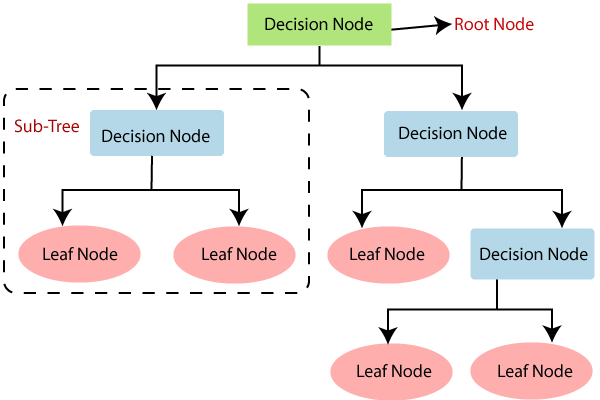

In [11]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [12]:
# 데이터 전처리

# 결측값 처리 -> Age 컬럼은 평균값 대체, Embarked 컬럼은 최빈값으로 대치, Cabin 너무 많아서 분석에서 제외
d_mean = df['Age'].mean()
df['Age'].fillna(d_mean, inplace=True)

d_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(d_mode, inplace=True)

# 텍스트값으로 되어있는 Sex 컬럼은 숫자 0(female)과 1(male)로 변환하는 레이블 인코딩
# Embarked 역시 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Sibsp, Parch의 값을 더해서 FamilySize 컬럼(파생변수) 생성
# df['FamilySize'] = df["Sibsp"] + df['Parch']

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0,0


In [13]:
# 분석 데이터셋 준비

X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# 데이터 분석 수행
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)

# 성능 평가 및 시각화
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
print(mat)

from sklearn.metrics import classification_report
rpt = classification_report(y_test, pred)
print(rpt)

0.7877094972067039
[[98 20]
 [18 43]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       118
           1       0.68      0.70      0.69        61

    accuracy                           0.79       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [16]:
# KNN을 이용한 붓꽃 종류 분류(예측) 분석 수행
# KNN 알고리즘은 서로 가까운 점들은 유사하다는 가정하에, 데이터로부터 거리가 가까운 k개의 다른 데이터의 정답을 참조하여 분류

# 필요패키지 임포트
import numpy as np
import pandas as pd
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv')
print(df.info())
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


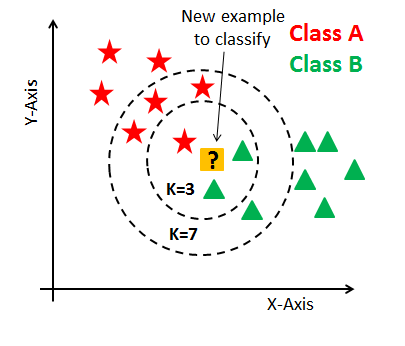

In [17]:
# 데이터 전처리
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['sepal_length']] = scaler.fit_transform(df[['sepal_length']])
df[['sepal_width']] = scaler.fit_transform(df[['sepal_width']])
df[['petal_length']] = scaler.fit_transform(df[['petal_length']])
df[['petal_width']] = scaler.fit_transform(df[['petal_width']])

# 분석 데이터 셋 준비
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# 데이터 분석 수행
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

# 성능평가 및 시각화
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_test, pred)
mat = confusion_matrix(y_test, pred)
rpt = classification_report(y_test, pred)
print(acc)
print(mat)
print(rpt)

0.9333333333333333
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
# SVM을 이용한 타이타닉 생존자 분류(예측) 분석 수행
# 서포트 벡터머신은 기계학습의 분야 중 하나로 패턴 인식, 자료 분석을 위한 지도학습 모델이며 주로 분류와 회귀 분석을 위해 사용된다.
# 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때, svm 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다.

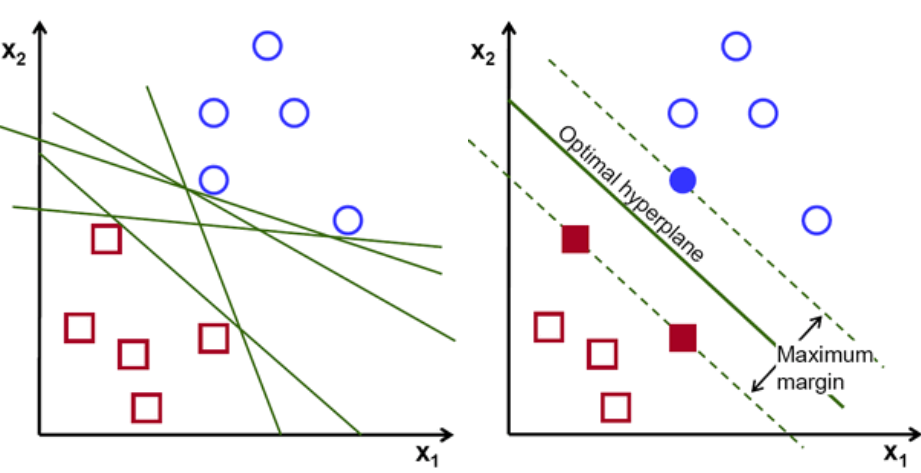

In [18]:
# 필요 패키지 임포트
import numpy as np
import pandas as pd
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
# 데이터 전처리

# 전처리 수행 1
d_mean = df['Age'].mean()
df['Age'].fillna(d_mean, inplace=True)

d_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(d_mode, inplace=True)

df['FamilySize'] = df['SibSp'] + df['Parch']

# 전처리 수행 2
onehot_sex = pd.get_dummies(df['Sex'])
df = pd.concat([df, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(df['Embarked'])
df = pd.concat([df, onehot_embarked], axis=1)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,False,True,True,False,False


In [29]:
# 분석 데이터셋 준비

X = df[['Pclass', 'Age', 'Fare', 'FamilySize', 'female', 'male', 'C', 'Q', 'S']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 데이터분석 수행
sv = svm.SVC(kernel='rbf')
sv.fit(X_train, y_train)

pred = sv.predict(X_test)

# 모델 성능 평가
acc = accuracy_score(y_test, pred)
mat = confusion_matrix(y_test, pred)
rpt = classification_report(y_test, pred)
print(acc, mat, rpt, sep='\n')

(623, 9)
(268, 9)
(623,)
(268,)
0.7238805970149254
[[167   7]
 [ 67  27]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       174
           1       0.79      0.29      0.42        94

    accuracy                           0.72       268
   macro avg       0.75      0.62      0.62       268
weighted avg       0.74      0.72      0.68       268



In [30]:
# SVM 커널 파라미터 조정
# 1. 커널 파라미터- rbf 적용
sv = svm.SVC(kernel='rbf')

# 2. 커널 파라미터- linear 적용, C=1, gamma=0.1
sv = svm.SVC(kernel='linear', C=1, gamma=0.1)  # C는 비용으로 조절해서 마진의 크기를 조절 gamma는 허용 표준편차로 데이터포인트별로 허용하는 표준편차가 작아지고 결정 경계도 작아지면서 구부러진다.

# 3. 커널 파라미터- rbf 적용, C=0.1, gamma=0.1
sv = svm.SVC(kernel='rbf', C=0.1, gamma=0.1)


In [31]:
# 로지스틱 회귀를 이용한 붓꽃 종류 분류(예측) 분석 수행
# 로지스틱 회귀라는 명칭을 가지고 있지만 분류 작업을하며 시그모이드 함수의 출력값을 각 분류 항목에 속하게 될 확률값으로 사용하며 이 값은 0과 1사이의 실수
# y = sigmoid(w * x + b)

# 접근 방법
# 로지스틱 회귀 알고리즘은 규제의 유형과 강도에 따라 분류(예측)의 정확도가 달라지므로, 적절한 값을 찾는 것이 중요하다.
# 규제가 필요한 이유는 모델이 학습용 데이터만 과도하게 학습한 겨우 이와 다른 데이터에 대하여 예측력이 낮아지는 과대적합 문제가 발생하는 것을 예방하기 위해서다.
# 규제의 유형은 LogisticRegression 클래스 내 penalty 매개변수에서 설정할 수 있으며, 기본값은 L2 규제(릿지방식)이고, L1 규제(라쏘 방식)를 선택할 수 있다.
# 규제의 강도는 LogisticRegression 클래스 내 C 매개변수에서 설정할 수 있으며, 기본값은 1.0이고, 값이 작을수록 규제가 강해진다.
# predict_proba() 메소드를 이용하여 각 분류 항목에 속할 확률을 확인할 수 있다.
#decision_function() 메소드를 이용하여 모델이 학습한 선형 방정식을 확인할 수 있으며, 다중 분류의 경우 각 분류 항목마다 선형 방정식을 계산한다.

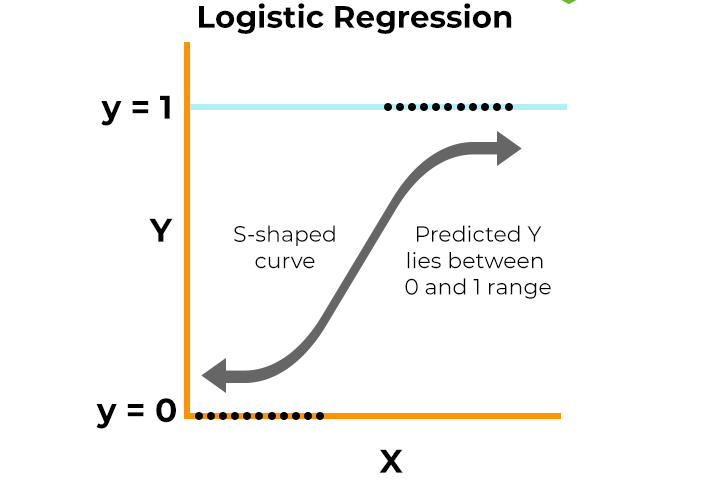

In [33]:
# 필요 패키지 임포트
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [35]:
# 데이터 전처리
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['sepal_length']] = scaler.fit_transform(df[['sepal_length']])
df[['sepal_width']] = scaler.fit_transform(df[['sepal_width']])
df[['petal_length']] = scaler.fit_transform(df[['petal_length']])
df[['petal_width']] = scaler.fit_transform(df[['petal_width']])

# 분석 데이터셋 준비
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# 데이터 분석 수행
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

# 성능 평가
acc = accuracy_score(y_test, pred)
mat = confusion_matrix(y_test, pred)
rpt = classification_report(y_test, pred)
print(acc, mat, rpt, sep='\n')

0.8333333333333334
[[9 0 0]
 [0 7 3]
 [0 2 9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.78      0.70      0.74        10
   virginica       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.83      0.83      0.83        30



In [36]:
# 랜덤 포레스트를 이용한 타이타닉 생존자 분류(예측) 분석 수행
# 다수의 의사결정 트리들을 배깅하여 분류 또는 회귀를 수행하는 앙상블 기법

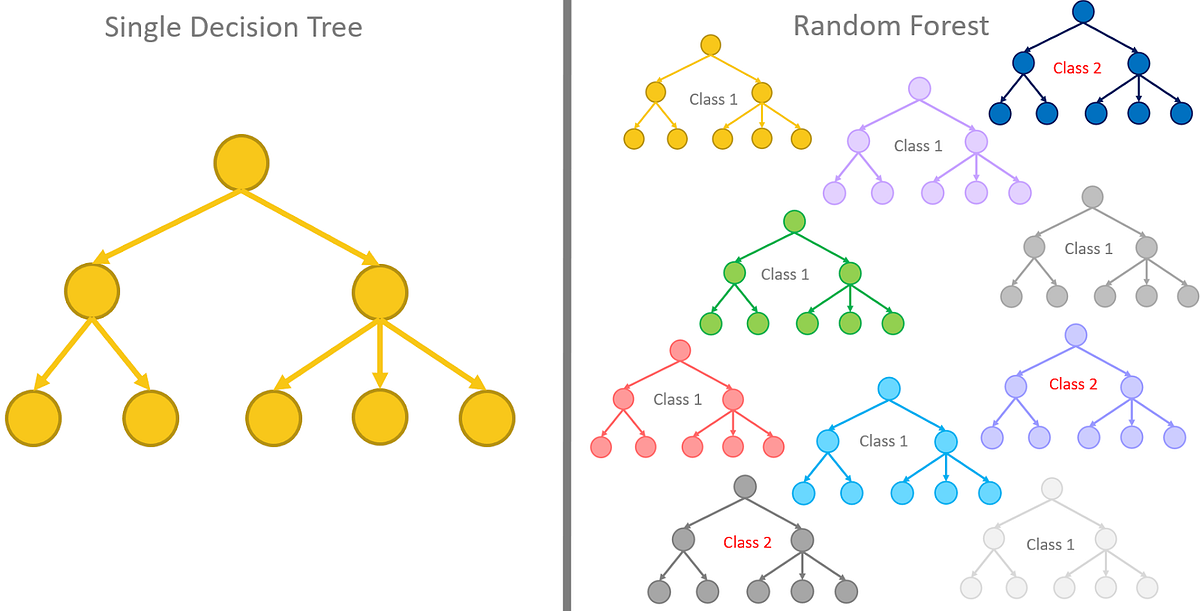

In [37]:
# 필요 패키지 임포트
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
# 데이터 전처리

# 결측값 처리 -> Age 컬럼은 평균값 대체, Embarked 컬럼은 최빈값으로 대치, Cabin 너무 많아서 분석에서 제외
d_mean = df['Age'].mean()
df['Age'].fillna(d_mean, inplace=True)

d_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(d_mode, inplace=True)

# 텍스트값으로 되어있는 Sex 컬럼은 숫자 0(female)과 1(male)로 변환하는 레이블 인코딩
# Embarked 역시 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Sibsp, Parch의 값을 더해서 FamilySize 컬럼(파생변수) 생성
df['FamilySize'] = df["SibSp"] + df['Parch']

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0,0


In [39]:
# 분석 데이터 셋 준비
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# 데이터 분석 수행
rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

# 성능평가
acc = accuracy_score(y_test, pred)
print(acc)

0.8603351955307262


---

* 지도학습 회귀(예측)
- 회귀는 예측값이 연속형 숫자 값으로 특정 변수가 다른 변수에 어떤 영향을 미치는지를 수학적 모형으로 설명, 예측하는 기법으로 독립변수로 종속변수를 예측하는 기법이다.

In [40]:
# 단순 선형 회귀를 이용한 분석 수행
# y = a * x + b => a는 회귀계수, b는 절편
# 회귀선(회귀계수)은 회귀모델을 1차 함수식으로 만들어주는 역할을 하며, 단순 선형 회귀는 기울기a와 절편b가 회귀계수이다.
# 실제값과 회귀모델에 의해 예측한 값의 차이를 잔차(오류)라고 하며, 잔차의 합이 최소가 되는 최저그이 회귀 계수를 찾아내는 것이 회귀 모델의 목표이다.
# 잔차는 + 또는 -가 될 수 있기 때문에, 잔차의 제곱의 합(RSS, Residual Sum of Squares)을 최소로 하는 최소제곱번(최소자승법)을 이용하여 잔차의 합이 최소가 되는 모델을 만든다.

In [41]:
# 필요 패키지 임포트
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [42]:
# 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [44]:
# 상관관계(Correlation) 분석
corr =df.corr(method='pearson')
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.777575 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.843751  0.896017   
displacement -0.804203   0.950721      1.000000    0.897787  0.932824   
horsepower   -0.777575   0.843751      0.897787    1.000000  0.864350   
weight       -0.831741   0.896017      0.932824    0.864350  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.687241 -0.417457   
model-year    0.579267  -0.348746     -0.370164   -0.420697 -0.306564   

              acceleration  model-year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.687241   -0.420697  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model-year        0.288137    1.000000  


In [47]:
# 데이터 전처리
df = df.dropna(axis=0)  # 결측값이 있는 행 전체 제거

# 분석 데이터셋 준비
X = df[['weight']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 데이터 분석 수행
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"기울기 a : {lr.coef_}")
print(f"y절편 b : {lr.intercept_}")

pred = lr.predict(X_test)

# 성능 평가 및 시각화
# 선형 회귀 분석의 평가는 결정계수인 R2 점수로 예측 정확도 판단할 수 있다.
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

기울기 a : [-0.00774371]
y절편 b : 46.62501834798047
0.7015633872576372


In [49]:
# 다중 선형 회귀분석을 이용한 예측 문제 해결
# y = a*x1 + b*x2 + .. + c

# 필요 패키지 임포트
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [51]:
# 데이터 살펴보기
df.info()

# 데이터 전처리
df = df.dropna(axis=0)
# ocean_procimity는 범주형 값으로 분석에서 제외
df = df.drop('ocean_proximity', axis=1)

# 변수들 간의 상관관계 분석
corr = df.corr(method='pearson')
print(corr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.

In [53]:
# 분석 데이터셋 준비
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 분석 수행
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"기울기: {lr.coef_}")
print(f"y절편 : {lr.intercept_}")

pred = lr.predict(X_test)

# 성능평가
score = r2_score(y_test, pred)
print(score)

기울기: [-4.21262308e+04 -4.20623763e+04  1.18784999e+03 -8.57874086e+00
  1.18123421e+02 -3.55751755e+01  3.73676747e+01  4.03297253e+04]
y절편 : -3530241.3077969495
0.6445130291082333


In [54]:
# 의사결정나무를 이용한 예측 문제 해결

# 필요한 패키지 임포트
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [55]:
# 데이터 살펴보기
df.info()

# 데이터 전처리
df = df.dropna(axis=0)
# ocean_procimity는 범주형 값으로 분석에서 제외
df = df.drop('ocean_proximity', axis=1)

# 변수들 간의 상관관계 분석
corr = df.corr(method='pearson')
print(corr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.

In [56]:
# 분석 데이터 셋 준비
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 분석 수행
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)

# 성능평가
# 의사결정나무 분석의 평가는 평균제곱오차(MSE)로 예측 정확도를 판단할 수 있다. 값이 작을수록 모형의 예측 능력이 좋다고 판단
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)

6793101269.876856


In [57]:
# 랜덤 포레스트를 이용한 예측 문제 해결

# 필요한 패키지 임포트
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [58]:
# 데이터 살펴보기
df.info()

# 데이터 전처리
df = df.dropna(axis=0)
# ocean_procimity는 범주형 값으로 분석에서 제외
df = df.drop('ocean_proximity', axis=1)

# 변수들 간의 상관관계 분석
corr = df.corr(method='pearson')
print(corr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.

In [59]:
# 분석 데이터 셋 준비
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터분석 수행
rfr = RandomForestRegressor(max_depth=3, random_state=42)
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

# 성능평가
mse = mean_squared_error(y_test, pred)
print(mse)

6447828605.376922


---

* 비지도 학습

- K-means 알고리즘
- 서로 유사한 데이터는 동일 그룹으로, 유사하지 않은 데이터는 다른 그룹으로 분류하는 군집분석의 대표적인 K-means 알고리즘은 K(그룹화하는 클러스터 또는 클러스터 중심 개수), means(각 클러스터 중심과 데이터드르이 평균 거리, 클러스터 중심을 centroid로 칭함)로 구성된다.
- 데이터셋에서 K개의 centroids를 임시 지정한 뒤 각 데이터들을 가장 가까운 centroids가 속한 그룹에 할당, 다시 centorids 업데이트 후 centroid가 변하지 않을 때까지 반복함으로써 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다.

In [62]:
# K-means 이용한 분석 수행

# 필요 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [64]:
# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
df['species'] = LabelEncoder().fit_transform(df['species'])

# 분석 데이터셋 준비
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# 데이터 분석 수행
cluster1 = KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=42)

# 생성모델로 데이터 학습
cluster1.fit(X)

# 결과값을 변수에 저장
cluster_center = cluster1.cluster_centers_
cluster_prediction = cluster1.predict(X)
print(pd.DataFrame(cluster_center))
print(cluster_prediction)

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          0         1         2         3
0  5.901613  2.748387  4.393548  1.433871
1  5.006000  3.428000  1.462000  0.246000
2  6.850000  3.073684  5.742105  2.071053
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [65]:
# 기존 데이터에 예측된 군집 결과를 붙여서 출력해보기
df['cluster'] = cluster_prediction
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [66]:
# 성능평가 및 시각화
# inertia는 각 군집별 오차의 제곱의 합으로 군집 내 분산으로 정의할 수 있는데 일반적으로K가 증가하게 되면 샘플이 할당된 centroid에 근접하므로 inertia가 감소하게 된다.
# elbow기법은 inertia가 빠르게 줄어드는 변화시점을 최적의 K로 성정하는 방법이다.
scope = range(1, 10)
inertias = []

for k in scope:
    model = KMeans(n_clusters = k, n_init=10, max_iter=500, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)
    print(k, inertias[k-1])

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 681.3706


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2 152.34795176035792


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3 78.85144142614601


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4 57.228473214285714


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5 46.46117267267268


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6 39.03998724608725


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


7 34.30581529581529


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


8 30.13244055461447


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


9 28.290635241951037


In [67]:
# 연관분석을 이용한 문제 해결
# 연관분석을 하나의 거래나 사건에 포함된 항목 간의 관련성을 파악하여 둘 이상의 항목들로 구성된 연관성 규칙을 도출한다.
# 장바구니 분석으로 알려져 있으며 연관성을 찾아내기 위해서는 연관성을 비교할 수 있는 규칙이 필요한데 규칙을 발견하기 위해 지지도, 신뢰도, 향상도를 평가 척도로 사용한다.
# 지지도 : A와 B를 모두 포함하는 경우의 확률로 클수록 관련도가 높다 -> support(A => B) = P(A∩B)
# 신뢰도 : A를 포함하는 경우에서 B를 포함하는 경우 수(조건부 확률)로 클수록 관련도가 높다 -> confidence(A => B) = P(B|A)
# 향상도 : 임의로(Random) B가 포함되는 경우에 비해 A와의 관계가 고려되어 포함되는 경우의 비율 -> lift(A => B) = confidence(A => B) / P(B) = P(A∩B) / p(A)p(B)

In [71]:
# pip install mlxtend

In [70]:
# 필요한 패키지 임포트
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/retail_dataset.csv', sep=',')
df

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


In [72]:
# 데이터 프레임의 요약정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


In [73]:
# 데이터 전처리

# 장바구니 데이터 고유항목 구분 출력
items = set()
for col in df:
    items.update(df[col].unique())

# 장바구니 목록 값(텍스트)을 수치로 표현-각 항목당 매칭될 경우 1로, 아니면 0로 표시(one-hot encoding)
itemset = set(items)
encoding = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    dismatching = list(itemset - rowset)
    matching = list(itemset.intersection(rowset))
    for i in dismatching:
        labels[i] = 0
    for j in matching:
        labels[j] = 1
    encoding.append(labels)
encoding[0]
result = pd.DataFrame(encoding)

result

,Milk,Bagel,NaN,Pencil,Meat,Cheese,Bread,Diaper,Eggs,Wine
0,0,0,0,1,1,1,1,1,1,1
1,1,0,0,1,1,1,1,1,0,1
2,1,0,1,0,1,1,0,0,1,1
3,1,0,1,0,1,1,0,0,1,1
4,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
310,0,0,1,0,0,1,1,0,1,0
311,1,0,1,1,1,0,0,0,0,0
312,0,0,0,1,1,1,1,1,1,1
313,0,0,1,0,1,1,0,0,0,0


In [74]:
# 분석 데이터셋 준비

# 첫쨰 Nan 열항목 삭제
result = result.drop(result.columns[0], axis=1)

# 분석 수행
# aprioir 함수 적용
freq_items = apriori(result, min_support=0.2, use_colnames=True)

# association_rules로 규칙 도축(신뢰도 임계치 0.6 기반)
rules = association_rules(freq_items, metric='confidence', min_threshold=0.6)
rules.head()

# association_rules()함수는 if-then 규칙 도출로 metric은 신뢰도, 향상도, 지지도 등이 있다.
# - antecedents를 구매했을 때 consequents도 함께 구매한다는 규칙이며, 각 규칙의 지지도, 신뢰도, 향상도를 보여준다.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(nan),0.425397,0.869841,0.336508,0.791045,0.909413,-0.033520,0.622902,-0.147743
1,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
2,(Pencil),(nan),0.361905,0.869841,0.266667,0.736842,0.847100,-0.048133,0.494603,-0.220499
3,(Meat),(nan),0.476190,0.869841,0.368254,0.773333,0.889051,-0.045956,0.574230,-0.192405
4,(Cheese),(nan),0.501587,0.869841,0.393651,0.784810,0.902245,-0.042651,0.604855,-0.178565
